In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
df = pd.read_csv('properties_missing_value_imputation.csv')

In [3]:
df.shape

(3554, 18)

In [4]:
df.head()

,property_type,society,sector,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,house,independent,sohna road road,6.25,6944.0,3.0,3.0,0,1.0,Moderately Old,9000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,flat,indiabulls centrum park,sector 103,1.15,8679.0,2.0,2.0,3,10.0,Relatively New,1080.0,1.0,0.0,0.0,0.0,0.0,2.0,174.0
2,flat,emaar gurgaon greens,sector 102,1.45,8788.0,3.0,3.0,3,8.0,Relatively New,1300.0,0.0,1.0,0.0,0.0,0.0,0.0,49.0
3,flat,ss the leaf,sector 85,1.05,6162.0,2.0,2.0,3+,7.0,Relatively New,1512.0,0.0,0.0,1.0,0.0,0.0,0.0,144.0
4,house,vatika india next,sector 83,1.70,7870.0,3.0,3.0,3+,4.0,New Property,2160.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0


In [5]:
latlong = pd.read_csv('latlong.csv')

In [6]:
latlong

,sector,coordinates
0,sector 1,"28.3663° N, 76.9456° E"
1,sector 2,"28.5095° N, 77.0320° E"
2,sector 3,"28.4909° N, 77.0176° E"
3,sector 4,"28.4738° N, 77.0107° E"
4,sector 5,"28.4794° N, 77.0176° E"
...,...,...
124,sector 113,"28.5287° N, 77.0233° E"
125,sector 114,"28.5334° N, 77.0118° E"
126,sector 115,"28.5385° N, 77.0061° E"
127,gwal pahari,"28.4484° N, 77.0210° E"


In [7]:
latlong['latitude'] = latlong['coordinates'].str.split(',').str.get(0).str.split('°').str.get(0).astype('float')

In [8]:
latlong['longitude'] = latlong['coordinates'].str.split(',').str.get(1).str.split('°').str.get(0).astype('float')

In [9]:
latlong.head()

,sector,coordinates,latitude,longitude
0,sector 1,"28.3663° N, 76.9456° E",28.3663,76.9456
1,sector 2,"28.5095° N, 77.0320° E",28.5095,77.0320
2,sector 3,"28.4909° N, 77.0176° E",28.4909,77.0176
3,sector 4,"28.4738° N, 77.0107° E",28.4738,77.0107
4,sector 5,"28.4794° N, 77.0176° E",28.4794,77.0176


In [10]:
new_df = df.merge(latlong, on='sector')

In [11]:
new_df.columns

Index(['property_type', 'society', 'sector', 'price', 'price_per_sqft',
       'bedRoom', 'bathroom', 'balcony', 'floorNum', 'agePossession',
       'built_up_area', 'study room', 'servant room', 'store room',
       'pooja room', 'others', 'furnishing_type', 'luxury_score',
       'coordinates', 'latitude', 'longitude'],
      dtype='object')

In [12]:
new_df.isnull().sum()

property_type      0
society            0
sector             0
price              0
price_per_sqft     0
bedRoom            0
bathroom           0
balcony            0
floorNum           0
agePossession      0
built_up_area      0
study room         0
servant room       0
store room         0
pooja room         0
others             0
furnishing_type    0
luxury_score       0
coordinates        0
latitude           0
longitude          0
dtype: int64

In [15]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3293 entries, 0 to 3292
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   property_type    3293 non-null   object 
 1   society          3293 non-null   object 
 2   sector           3293 non-null   object 
 3   price            3293 non-null   float64
 4   price_per_sqft   3293 non-null   float64
 5   bedRoom          3293 non-null   float64
 6   bathroom         3293 non-null   float64
 7   balcony          3293 non-null   object 
 8   floorNum         3293 non-null   float64
 9   agePossession    3293 non-null   object 
 10  built_up_area    3293 non-null   float64
 11  study room       3293 non-null   float64
 12  servant room     3293 non-null   float64
 13  store room       3293 non-null   float64
 14  pooja room       3293 non-null   float64
 15  others           3293 non-null   float64
 16  furnishing_type  3293 non-null   float64
 17  luxury_score  

In [21]:
new_df[['sector','latitude','longitude']]

,sector,latitude,longitude
0,sector 103,28.4949,76.9845
1,sector 103,28.4949,76.9845
2,sector 103,28.4949,76.9845
3,sector 103,28.4949,76.9845
4,sector 103,28.4949,76.9845
...,...,...,...
3288,sector 17b,28.4806,77.0663
3289,sector 88b,28.4446,76.9542
3290,sector 88b,28.4446,76.9542
3291,sector 88b,28.4446,76.9542


In [28]:
new_df.groupby('sector').agg({'price':'mean','price_per_sqft':'mean','built_up_area':'mean'})

,price,price_per_sqft,built_up_area
sector,,,
gwal pahari,3.192222,9585.777778,3056.166667
manesar,0.962258,4608.064516,2027.367742
sector 1,1.860000,8249.833333,2327.833333
sector 102,1.696636,10603.822430,1556.130841
sector 103,1.495000,7445.785714,1865.428571
...,...,...,...
sector 92,0.934000,5928.290000,1571.341800
sector 93,0.848889,8009.888889,1017.000000
sector 95,0.480545,5602.509091,995.981818


In [35]:
x = new_df[['sector','price','price_per_sqft','built_up_area','latitude','longitude']]

In [36]:
x

,sector,price,price_per_sqft,built_up_area,latitude,longitude
0,sector 103,1.15,8679.0,1080.0,28.4949,76.9845
1,sector 103,1.32,7788.0,1300.0,28.4949,76.9845
2,sector 103,0.80,5517.0,1450.0,28.4949,76.9845
3,sector 103,1.15,7765.0,1250.0,28.4949,76.9845
4,sector 103,1.34,7882.0,1725.0,28.4949,76.9845
...,...,...,...,...,...,...
3288,sector 17b,6.95,15444.0,3500.0,28.4806,77.0663
3289,sector 88b,0.92,7360.0,1300.0,28.4446,76.9542
3290,sector 88b,1.10,8148.0,1350.0,28.4446,76.9542
3291,sector 88b,0.92,6815.0,1350.0,28.4446,76.9542


In [37]:
group_df = x.groupby('sector').mean()[['price','price_per_sqft','built_up_area','latitude','longitude']]

In [38]:
group_df

,price,price_per_sqft,built_up_area,latitude,longitude
sector,,,,,
gwal pahari,3.192222,9585.777778,3056.166667,28.4484,77.0210
manesar,0.962258,4608.064516,2027.367742,28.3515,76.9428
sector 1,1.860000,8249.833333,2327.833333,28.3663,76.9456
sector 102,1.696636,10603.822430,1556.130841,28.4750,76.9715
sector 103,1.495000,7445.785714,1865.428571,28.4949,76.9845
...,...,...,...,...,...
sector 92,0.934000,5928.290000,1571.341800,28.4079,76.9153
sector 93,0.848889,8009.888889,1017.000000,28.4153,76.9326
sector 95,0.480545,5602.509091,995.981818,28.4172,76.9081


In [14]:
group_df

,price,price_per_sqft,built_up_area,latitude,longitude
sector,,,,,
gwal pahari,3.192222,9585.777778,3056.166667,28.4484,77.0210
manesar,0.962258,4608.064516,2027.367742,28.3515,76.9428
sector 1,1.860000,8249.833333,2327.833333,28.3663,76.9456
sector 102,1.696636,10603.822430,1556.130841,28.4750,76.9715
sector 103,1.495000,7445.785714,1865.428571,28.4949,76.9845
...,...,...,...,...,...
sector 92,0.934000,5928.290000,1571.341800,28.4079,76.9153
sector 93,0.848889,8009.888889,1017.000000,28.4153,76.9326
sector 95,0.480545,5602.509091,995.981818,28.4172,76.9081


In [19]:
fig = px.scatter_mapbox(group_df, lat="latitude", lon="longitude", color="price_per_sqft", size='built_up_area',
                  color_continuous_scale=px.colors.cyclical.IceFire, zoom=10,
                  mapbox_style="open-street-map",text=group_df.index)
fig.show()

In [20]:
## area with bigger circles indicates that area has properties with bigger area as compared to area with smaller circles.

In [21]:
new_df.to_csv('data_viz1.csv',index=False)

In [48]:
new_df.columns

Index(['property_type', 'society', 'sector', 'price', 'price_per_sqft',
       'bedRoom', 'bathroom', 'balcony', 'floorNum', 'agePossession',
       'built_up_area', 'study room', 'servant room', 'store room',
       'pooja room', 'others', 'furnishing_type', 'luxury_score',
       'coordinates', 'latitude', 'longitude'],
      dtype='object')

In [25]:
df.shape

(3554, 18)

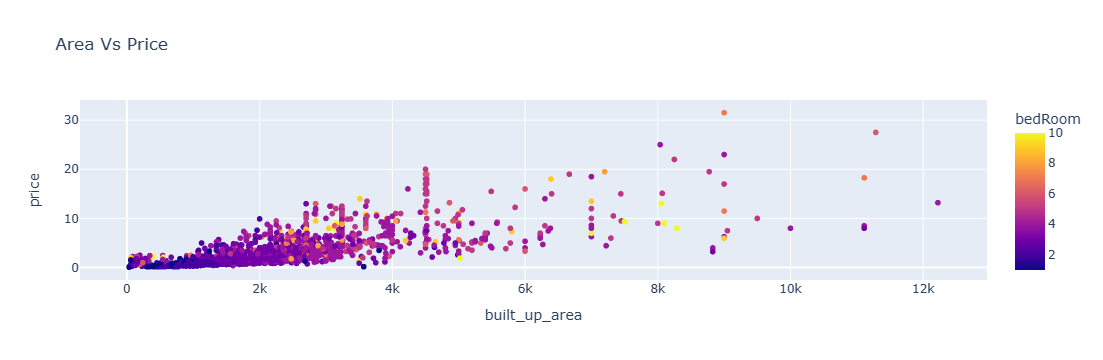

In [32]:
fig = px.scatter(df, x="built_up_area", y="price", color="bedRoom", title="Area Vs Price")

# Show the plot
fig.show()

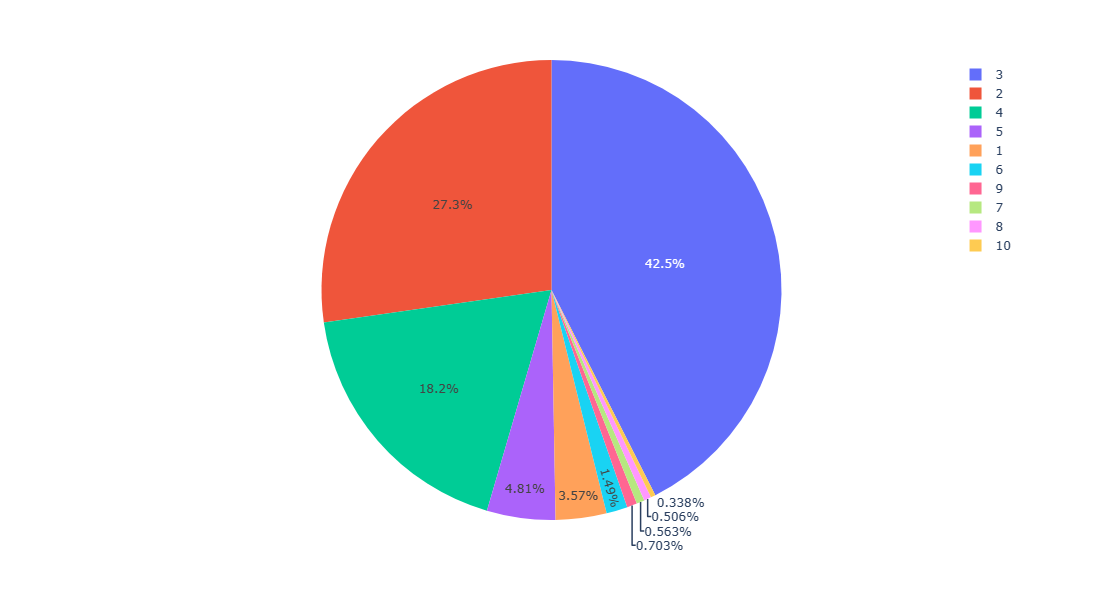

In [37]:
fig = px.pie(df, names='bedRoom')

fig.update_layout(
    autosize=False,
    width=600,
    height=600,
)

# Show the plot
fig.show()

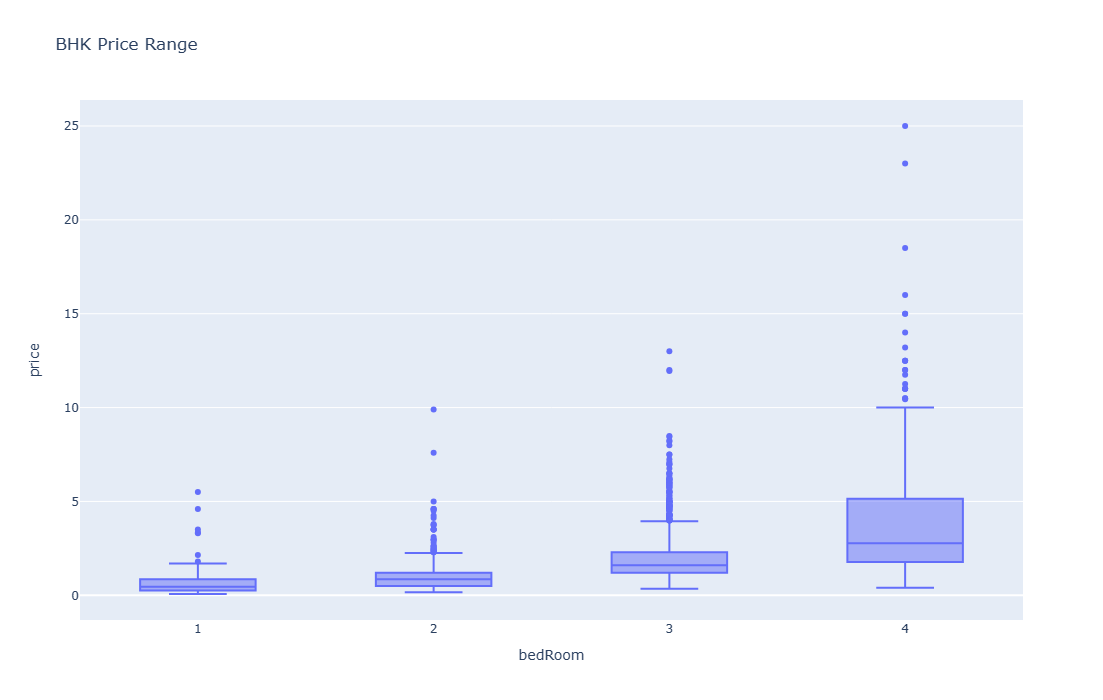

In [43]:
temp_df = df[df['bedRoom'] <= 4]
# Create side-by-side boxplots of the total bill amounts by day
fig = px.box(temp_df, x='bedRoom', y='price', title='BHK Price Range')

fig.update_layout(
    autosize=False,
    width=1000,
    height=700,
)

# Show the plot
fig.show()

C:\Users\YASH SHARMA\AppData\Local\Temp\ipykernel_4664\3761596323.py:1: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


C:\Users\YASH SHARMA\AppData\Local\Temp\ipykernel_4664\3761596323.py:2: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




<Axes: xlabel='price', ylabel='Density'>

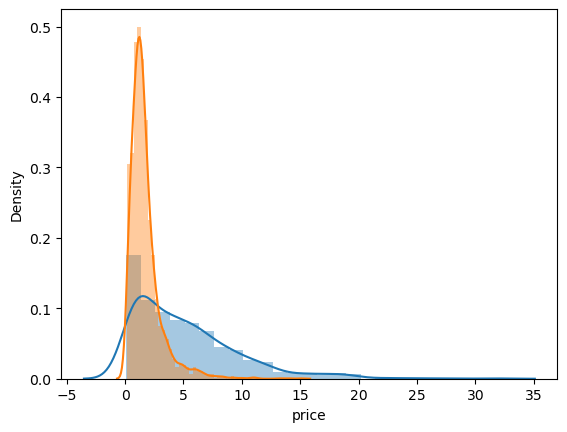

In [44]:
sns.distplot(df[df['property_type'] == 'house']['price'])
sns.distplot(df[df['property_type'] == 'flat']['price'])

In [69]:
x= new_df.groupby(['property_type']).mean()['luxury_score']
x.columns=['a','b']
x

C:\Users\YASH SHARMA\AppData\Local\Temp\ipykernel_4664\1814628946.py:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



property_type
flat     80.164729
house    48.252454
Name: luxury_score, dtype: float64

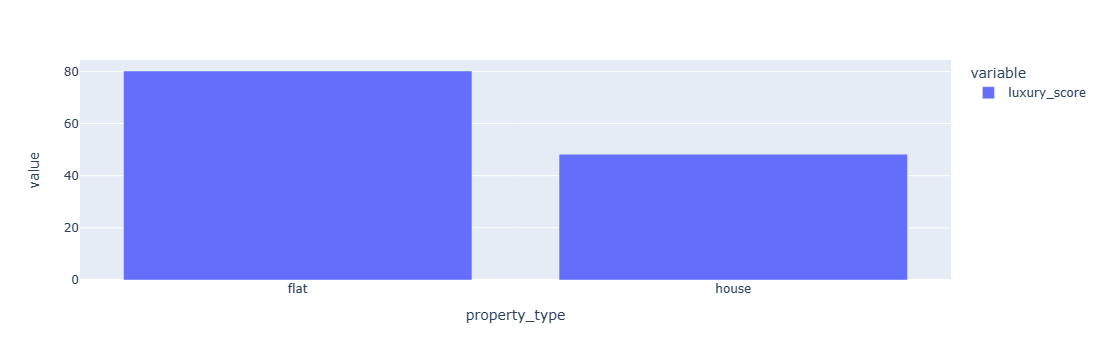

In [74]:
fig = px.bar(x)
fig.show()

In [53]:
new_df.columns

Index(['property_type', 'society', 'sector', 'price', 'price_per_sqft',
       'bedRoom', 'bathroom', 'balcony', 'floorNum', 'agePossession',
       'built_up_area', 'study room', 'servant room', 'store room',
       'pooja room', 'others', 'furnishing_type', 'luxury_score',
       'coordinates', 'latitude', 'longitude'],
      dtype='object')

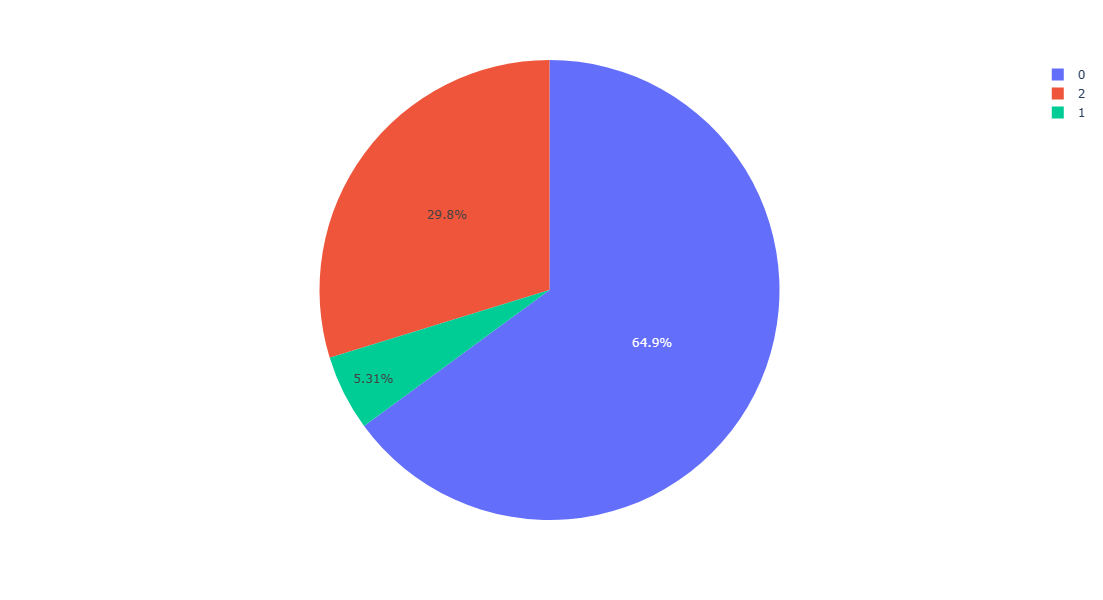

In [76]:
fig = px.pie(new_df, names='furnishing_type')

fig.update_layout(
    autosize=False,
    width=600,
    height=600,
)

# Show the plot
fig.show()

In [2]:
from sklearn

NameError: name 'scikit' is not defined